In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC

## Loading Data sets

In [5]:
# Dataset 1 from Homework 1: credit cards
credit = pd.read_csv("creditcard.csv")
fraud_df = credit.loc[credit['Class'] == 1]
non_fraud_df = credit.loc[credit['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

DATASET1 = new_df.dropna()
DATASET1 = DATASET1[['V1','V2','V3','V4','V5','V6','Class']]

X1 = DATASET1
Y1=DATASET1['Class']
X1.drop(['Class'], axis=1,inplace=True)


In [6]:
# Dataset 2 from Homework 1: Data Science Salaries
salaries = pd.read_csv("salaries.csv")
#salaries = pd.get_dummies(salaries, columns=['job_title', 'job_category', 'experience_level', 'work_setting','employment_type','company_location','company_size','salary_currency', 'salary', 'employee_residence'])
salaries['job_title'] = salaries['job_title'].str.replace('Business Intelligence','BI')
salaries['job_title'] = salaries['job_title'].str.replace('Machine Learning','ML')
salaries.drop(['salary_currency','salary'], axis = 1, inplace = True)

set1 = sorted(set(salaries['job_title']))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['job_title'] = salaries['job_title'].replace(dictionary)

set1 = sorted(set(salaries["job_category"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['job_category'] = salaries['job_category'].replace(dictionary)

set1 = sorted(set(salaries["employee_residence"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employee_residence'] = salaries['employee_residence'].replace(dictionary)

set1 = sorted(set(salaries["experience_level"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['experience_level'] = salaries['experience_level'].replace(dictionary)

set1 = sorted(set(salaries["employee_residence"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employee_residence'] = salaries['employee_residence'].replace(dictionary)

set1 = sorted(set(salaries["employment_type"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employment_type'] = salaries['employment_type'].replace(dictionary)

set1 = sorted(set(salaries["work_setting"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['work_setting'] = salaries['work_setting'].replace(dictionary)

set1 = sorted(set(salaries["company_location"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['company_location'] = salaries['company_location'].replace(dictionary)

set1 = sorted(set(salaries["company_size"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['company_size'] = salaries['company_size'].replace(dictionary)


DATASET2 = salaries.dropna()

DATASET2['salary_in_usd'] = DATASET2['salary_in_usd']>100000
DATASET2['salary_in_usd'] = DATASET2['salary_in_usd'].astype(int)


X2 = DATASET2
Y2=DATASET2['salary_in_usd']
X2.drop(['salary_in_usd'], axis=1,inplace=True)


###               PCA 
### Expectation Maximization 

In [10]:
# Data1 Expectation Maximization 
pca = PCA(n_components=3)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X1)
X_pca

gm = GaussianMixture(n_components=2,covariance_type = 'spherical').fit(X_pca)
train_predict1 = gm.predict(X_pca)
train_acc1 = metrics.accuracy_score(Y1,train_predict1)
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)

Full Covariance: 
  Training Accuracy:  0.8892276422764228


In [14]:
# Data2 
pca = PCA(n_components=3)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X2)
X_pca

gm = GaussianMixture(n_components=2,covariance_type = 'spherical').fit(X_pca)
train_predict1 = gm.predict(X_pca)
train_acc1 = metrics.accuracy_score(Y2,train_predict1)
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)

Full Covariance: 
  Training Accuracy:  0.5909139497594869



###  Agglomerative Clustering 

In [28]:
# Data1 Expectation Maximization 
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X1)
X_pca

gm = AgglomerativeClustering(n_clusters=2,linkage = 'ward').fit(X_pca)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(Y1,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Ward linkage: ")
print("  Training Accuracy: ", train_acc1)

Ward linkage: 
  Training Accuracy:  0.5691056910569106


In [27]:
# Data2 
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X2)
X_pca

gm = AgglomerativeClustering(n_clusters=2,linkage = 'ward').fit(X2)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(Y2,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Ward linkage: ")
print("  Training Accuracy: ", train_acc1)

Ward linkage: 
  Training Accuracy:  0.47311598075895245


### ICA


### Expectation Maximization 

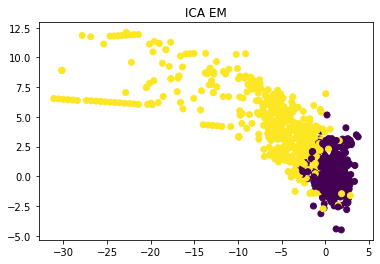

Full Covariance: 
  Training Accuracy:  0.9105691056910569


In [58]:
# Data1 Expectation Maximization 
ica = FastICA(n_components=2)  # Reducing to 2 dimensions for visualization
X_ica = ica.fit_transform(X1)

X_ica

gm = GaussianMixture(n_components=2).fit(X_ica)
train_predict1 = gm.predict(X_ica)
train_acc1 = metrics.accuracy_score(Y1,train_predict1)
plt.scatter(X1['V3'], X1['V4'],c=train_predict1)
plt.title("ICA EM")
plt.show()
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)

In [25]:
# Data2 
pca = FastICA(n_components=2)  # Reducing to 2 dimensions for visualization
X_ica = ica.fit_transform(X2)

X_ica

gm = GaussianMixture(n_components=2).fit(X_ica)
train_predict1 = gm.predict(X_ica)
train_acc1 = metrics.accuracy_score(Y2,train_predict1)
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)


Full Covariance: 
  Training Accuracy:  0.8023516835916622



###  Agglomerative Clustering 

In [32]:
# Data1 Expectation Maximization 
ica = FastICA(n_components=2)  # Reducing to 2 dimensions for visualization
X_ica = ica.fit_transform(X1)

X_ica


gm = AgglomerativeClustering(n_clusters=2).fit(X_ica)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(Y1,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Agglomerative Clustering: ")
print("  Training Accuracy: ", train_acc1)

Ward linkage: 
  Training Accuracy:  0.15040650406504066


In [34]:
# Data2 
ica = FastICA(n_components=2)  # Reducing to 2 dimensions for visualization
X_ica = ica.fit_transform(X2)

X_ica

gm = AgglomerativeClustering(n_clusters=2).fit(X2)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(Y2,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Agglomerative Clustering: ")
print("  Training Accuracy: ", train_acc1)

Agglomerative Clustering: 
  Training Accuracy:  0.47311598075895245


### Randomized projection


### Expectation Maximization 

In [40]:
# Data1 Expectation Maximization 
sr = SparseRandomProjection(n_components=2)  # Reducing to 2 dimensions for visualization
X_sr= sr.fit_transform(X1)

X_sr

gm = GaussianMixture(n_components=2).fit(X_sr)
train_predict1 = gm.predict(X_sr)
train_acc1 = metrics.accuracy_score(Y1,train_predict1)
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)

Full Covariance: 
  Training Accuracy:  0.6829268292682927


In [43]:
# Data2 
sr = SparseRandomProjection(n_components=2)  # Reducing to 2 dimensions for visualization
X_sr= sr.fit_transform(X2)

X_sr

gm = GaussianMixture(n_components=2).fit(X_sr)
train_predict1 = gm.predict(X_sr)
train_acc1 = metrics.accuracy_score(Y2,train_predict1)
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)


Full Covariance: 
  Training Accuracy:  0.2559059326563335



###  Agglomerative Clustering 

In [44]:
# Data1 Expectation Maximization 
sr = SparseRandomProjection(n_components=2)  # Reducing to 2 dimensions for visualization
X_sr= sr.fit_transform(X1)

X_sr


gm = AgglomerativeClustering(n_clusters=2).fit(X_sr)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(Y1,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Agglomerative Clustering: ")
print("  Training Accuracy: ", train_acc1)

Agglomerative Clustering: 
  Training Accuracy:  0.6270325203252033


In [45]:
# Data2 
sr = SparseRandomProjection(n_components=2)  # Reducing to 2 dimensions for visualization
X_sr= sr.fit_transform(X2)

X_sr

gm = AgglomerativeClustering(n_clusters=2).fit(X_sr)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(Y2,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Agglomerative Clustering: ")
print("  Training Accuracy: ", train_acc1)

Agglomerative Clustering: 
  Training Accuracy:  0.4632816675574559


In [28]:
# Data 1
rp = SparseRandomProjection(n_components=2)  
X_rp = rp.fit_transform(X1)
X_rp

array([[ -0.40593143,  -0.18274692],
       [-12.2185518 ,   6.22009066],
       [ -4.17960709,   1.39918072],
       ...,
       [  2.31403565,  -2.41028768],
       [  0.14847482,   0.13222217],
       [  5.87327302,   4.89227136]])

In [29]:
# Data 2
rp = SparseRandomProjection(n_components=2)  
X_rp = rp.fit_transform(X2)
X_rp


array([[-2439.69178381,  2505.82800687],
       [-2448.26499791,  2560.94152608],
       [-2448.26499791,  2560.94152608],
       ...,
       [-2356.40913256,  2559.71678121],
       [-2406.62367228,  2556.04254659],
       [-2458.06295688,  2558.49203634]])

### Manifold Learning Algorithm ( t-SNE) 

In [46]:
# Data 1
tsne = TSNE(n_components=2, random_state=42)
X_tsne1 = tsne.fit_transform(X1)
X_tsne1

array([[ -7.012452 , -32.393105 ],
       [ -1.0454497,  26.064125 ],
       [ 32.928486 ,   8.500469 ],
       ...,
       [ 49.45087  ,  -1.3738984],
       [ -5.538813 ,   7.7059584],
       [-14.59629  , -10.647065 ]], dtype=float32)

In [47]:
# Data 1
tsne = TSNE(n_components=2)
X_tsne2 = tsne.fit_transform(X2)
X_tsne2

array([[ 34.908367 ,  -2.2019951],
       [-73.6218   ,   3.658323 ],
       [-72.952896 ,   3.5868788],
       ...,
       [-51.335747 ,  31.670801 ],
       [ -6.6569986, -57.088818 ],
       [-11.125303 ,  73.249626 ]], dtype=float32)


### Expectation Maximization 

In [48]:
# Data1 Expectation Maximization 
sr = SparseRandomProjection(n_components=2)  # Reducing to 2 dimensions for visualization
X_sr= sr.fit_transform(X_tsne1)

X_sr

gm = GaussianMixture(n_components=2).fit(X_sr)
train_predict1 = gm.predict(X_sr)
train_acc1 = metrics.accuracy_score(Y1,train_predict1)
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)

Full Covariance: 
  Training Accuracy:  0.34552845528455284


In [49]:
# Data2 
sr = SparseRandomProjection(n_components=2)  # Reducing to 2 dimensions for visualization
X_sr= sr.fit_transform(X_tsne2)

X_sr

gm = GaussianMixture(n_components=2).fit(X_sr)
train_predict1 = gm.predict(X_sr)
train_acc1 = metrics.accuracy_score(Y2,train_predict1)
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)


Full Covariance: 
  Training Accuracy:  0.3982896846606093



###  Agglomerative Clustering 

In [50]:
# Data1 Expectation Maximization 
sr = SparseRandomProjection(n_components=2)  # Reducing to 2 dimensions for visualization
X_sr= sr.fit_transform(X_tsne1)

X_sr


gm = AgglomerativeClustering(n_clusters=2).fit(X_sr)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(Y1,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Agglomerative Clustering: ")
print("  Training Accuracy: ", train_acc1)

Agglomerative Clustering: 
  Training Accuracy:  0.2936991869918699


In [51]:
# Data2 
sr = SparseRandomProjection(n_components=2)  # Reducing to 2 dimensions for visualization
X_sr= sr.fit_transform(X_tsne2)

X_sr

gm = AgglomerativeClustering(n_clusters=2).fit(X_sr)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(Y2,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Agglomerative Clustering: ")
print(" Training Accuracy: ", train_acc1)

Agglomerative Clustering: 
  Training Accuracy:  0.4089791555318012
